<a href="https://colab.research.google.com/github/Ryguy-1/cs4774-codeathons/blob/main/zbp6dw_codeathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Codeathon 3: AI Chatbot Generation with LLMs
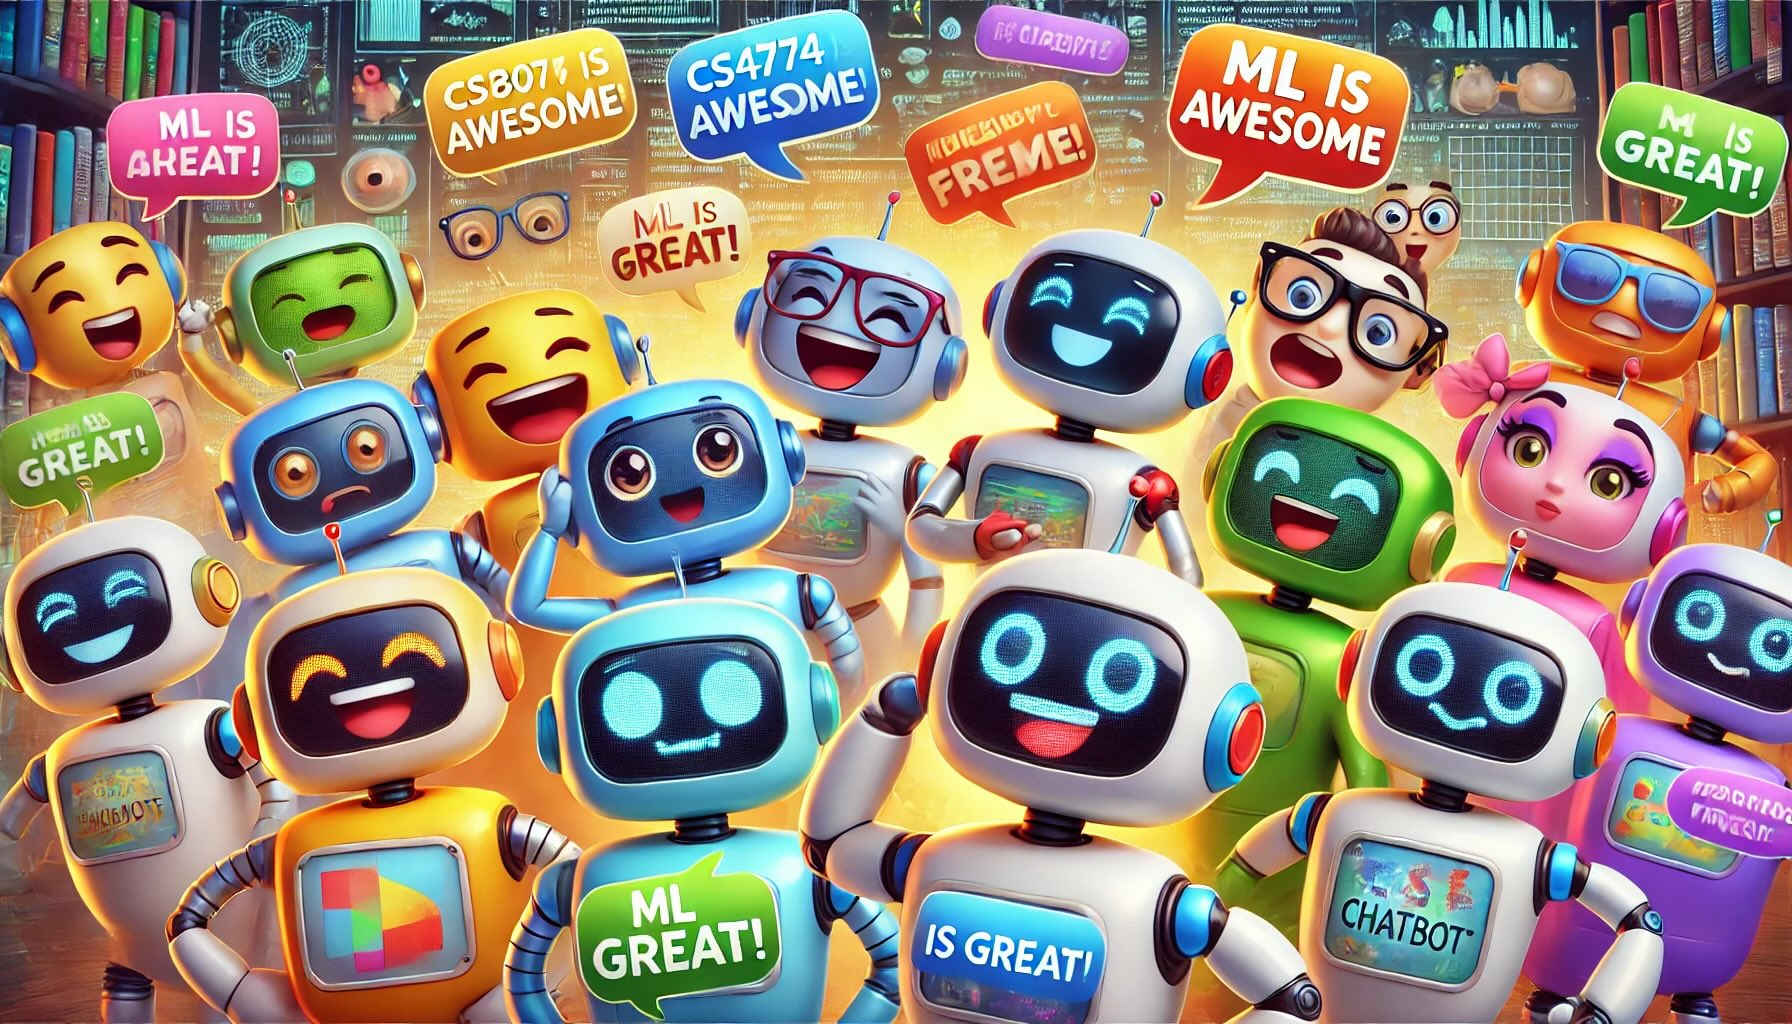
Alan Turing once posed the question, "Can machines think?" Today, chatbots powered by large language models (LLMs) are among the most sophisticated examples of machines engaging in human-like conversation. For this Codeathon, your task is to leverage an LLM to build a chatbot that can understand and respond intelligently to user queries. This chatbot will explore natural language processing, sequence modeling, and language generation fundamentals.

In this codeathon, you'll implement at least two out of three leading LLMs—OpenAI GPT, Meta LLaMA, and Google Gemini—to build your chatbot. You'll then analyze the unique characteristics and performance of each model, iterating with fine-tuning to see how the models evolve in response quality.

* **Design**: Your task is to connect and configure the LLMs and implement them in a chatbot that can handle structured, engaging conversations. You will observe and analyze differences between the models in handling conversations. You'll also fine-tune the model to improve response quality.

* **Implementation**: To get you started, you can use the code provided in the template. You'll integrate each model via API, compare responses, and implement a chatbot-to-chatbot loop where the two models "talk" to each other for a fixed number of exchanges. Fine-tune the models using a small/large dataset to see how their responses improve. Finally, implement a benchmark system that ranks the performance of each LLMs based on a standardized test, helping you compare the effectiveness of each model.


To make it easier for you, some code has been provided to help you connect with the APIs and process the data. You may modify it to fit your needs. Please submit the .ipynb file via UVA Canvas in the following format: **yourComputingID_codeathon_3.ipynb**


**Important Note**: Make sure your submission contains the outputs as TAs will not be able to directly run your code due to API security.

## 1. Dependencies
**Objective**: Set up the necessary environment and install dependencies to run the models.

*   Install Necessary Libraries: Download and install packages such as transformers, torch, and openai.
* Important Note: Use a T4 or equivalent GPU in Colab for optimal performance, as some functions require GPU access.

In [ ]:
# Install the OpenAI library for interacting with OpenAI's GPT models
!pip install openai
# Install the Google Generative AI library for interacting with Google Gemini models
!pip install -q -U google-generativeai
# Install Hugging Face Transformers, PyTorch, and Accelerate for working with various language models
# Install bitsandbytes for efficient model quantization
!pip install transformers torch accelerate bitsandbytes
# Upgrade Transformers to the latest version to ensure compatibility with recent models and features
!pip install --upgrade transformers
# (Optional) Install llama-recipes if you plan to fine-tune LLaMA models; also install ipywidgets for interactive widgets in Jupyter
# !pip install llama-recipes ipywidgets
# Install NLTK and rouge-score for evaluating text generation models using BLEU, ROUGE, and other language metrics
!pip install nltk rouge-score
# Install bert-score for evaluating model performance based on BERT embeddings for semantic similarity
!pip install bert-score

  Using cached rouge_score-0.1.2-py3-none-any.whl


## 2. Models Setup
**Objective**: Explore at least two out of three models available in this Codeathon—GPT, LLaMA, and Gemini—and use them to perform text generation. Optional tasks include multimedia generation and analysis.

*   Check [Video](https://youtu.be/tD4eW3q02ZE?si=wqgrCeCL27TtKnoF) Tutorial for step-by-step API key setup corresponding to [ReadMe](https://docs.google.com/document/d/1S0wQ4bc88NMbjQJRrU86mRPxoi_urUL4uD5tTo-9KYQ/edit?usp=sharing).
* Model Initialization: Configure each model you choose through its API through corresponding Classes **(Gemini_Chatbot(), LLaMA_Chatbot(), OpenAI_Chatbot())** for generating responses.
* Make sure your chatbots could access the **entire chat history** instead of the just last reply and be able to **reset** the chat history. Print results to check!
* Text Generation: Test each model on basic text-generation tasks. Note the style, coherence, and clarity of their responses.
* (Optional) Multimedia Support:

 * Audio Input: Test a model that can analyze audio input.
 * Image Input: Test a model that can analyze image input.
 * Generation: Use a model to generate image and audio output if possible.

Please Note: While Meta Llama and Google Gemini offer free models usage through APIs, OpenAI GPT is not free of charge. Check the Video for more information.

Official Documentations: [Google Gemini Documentation](https://ai.google.dev/api?authuser=2&lang=python), [OpenAI GPT Documentation](https://platform.openai.com/docs/overview), [Meta Llama Documentation](https://www.llama.com/docs/overview).








### Gemini

In [ ]:
# # Take Gemini as an example, you don't have to use it.
# import google.generativeai as genai
# # Get access to the colab secret key chain
# from google.colab import userdata

# # Example Set Up of the API key stored in Google Colab secret keys
# GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)

# class Gemini_Chatbot:
#     def __init__(self, system_prompt="You are a helpful assistant."):
#         self.model = genai.GenerativeModel("gemini-1.5-flash")
#         self.chat = self.model.start_chat(
#             history=[{"role": "model", "parts": system_prompt}]
#         )

#     def converse(self, user_input):
#         response = self.chat.send_message(user_input)
#         return response.text

#     def reset(self, system_prompt="You are a helpful assistant."):
#         self.chat = self.model.start_chat(
#             history=[{"role": "model", "parts": system_prompt}]
#         )

#     def print_history(self):
#         for entry in self.chat.history:
#             role = entry.role.capitalize()
#             content = entry.parts[0].text
#             print(f"{role}: {content}\n")

# # Test your implmentation!
# gemini_chatbot = Gemini_Chatbot()

# prompt = "Explain the concept of Generative AI."
# response = gemini_chatbot.converse(prompt)
# prompt = "How does it differ from traditional programming?"
# response = gemini_chatbot.converse(prompt)
# print("Conversation History:\n")
# gemini_chatbot.print_history()

# gemini_chatbot.reset()
# print("\nConversation history has been reset.")
# print("\nCurrent Conversation History after Reset:\n")
# gemini_chatbot.print_history()

### Llama

In [ ]:
import transformers
import torch
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from huggingface_hub import login
from google.colab import userdata

class LLaMA_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant.", model_id="meta-llama/Llama-3.2-3B-Instruct"):
        my_secret_key = userdata.get('HF_TOKEN')
        login(token=my_secret_key)

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_quant_type='nf4',
            bnb_4bit_compute_dtype=torch.bfloat16
        )

        self.tokenizer = AutoTokenizer.from_pretrained(model_id)
        self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = AutoModelForCausalLM.from_pretrained(
            model_id,
            quantization_config=bnb_config,
            device_map='auto'
        )

        self.text_generator = transformers.pipeline(
            "text-generation",
            model=self.model,
            tokenizer=self.tokenizer,
            max_new_tokens=1024
        )

        self.history = [{"role": "system", "content": system_prompt}]

    def converse(self, user_input):
        self.history.append({"role": "user", "content": user_input})

        response = self.text_generator(
            self.history,
        )[0]['generated_text'][-1]

        self.history.append(response)
        return response['content']

    def reset(self, system_prompt="You are a helpful assistant."):
        self.history = [{"role": "system", "content": system_prompt}]

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")


# Test your implmentation!
llama_chatbot = LLaMA_Chatbot()

prompt = "Explain the concept of Generative AI."
response = llama_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = llama_chatbot.converse(prompt)

print("Conversation History:\n")
llama_chatbot.print_history()

llama_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
llama_chatbot.print_history()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

Assistant: Generative AI, also known as Generative Models or Generative Adversarial Networks (GANs), is a subset of artificial intelligence (AI) that enables the creation of new, synthetic data that is indistinguishable from real data. This concept has far-reaching implications in various fields, including computer vision, natural language processing, and music generation.

**Key characteristics of Generative AI:**

1. **Data generation**: Generative AI models are designed to generate new data that resembles existing data, such as images, videos, text, or music.
2. **Learning**: These models learn patterns and structures in the data they are trained on, allowing them to generate new data that is similar in style and content.
3. **Probabilistic nature**: Generative AI models often rely on probabilistic distributions to generate new data, making them flexible and adaptable to differe

### GPT

In [ ]:
from google.colab import userdata
from openai import OpenAI

class OpenAI_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.api_key = userdata.get("OpenAI_API")
        self.client = OpenAI(api_key=self.api_key)
        self.history = [{"role": "system", "content": system_prompt}]

    def converse(self, user_input):
        self.history.append({"role": "user", "content": user_input})
        completion = self.client.chat.completions.create(
            model="gpt-4o-mini",
            messages=self.history
        )
        response = completion.choices[0].message.content
        self.history.append({"role": "assistant", "content": response})
        return response

    def reset(self, system_prompt="You are a helpful assistant."):
      self.history = [{"role": "system", "content": system_prompt}]

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")


# Test your implmentation!
openai_chatbot = OpenAI_Chatbot()

prompt = "Explain the concept of Generative AI."
response = openai_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = openai_chatbot.converse(prompt)

print("Conversation History:\n")
openai_chatbot.print_history()

openai_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
openai_chatbot.print_history()


Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

Assistant: Generative AI refers to a class of artificial intelligence systems designed to create content, such as text, images, music, and other forms of media, based on patterns learned from existing data. Unlike traditional AI, which is primarily focused on classification or analyzing data, generative AI models have the capability to generate new and original outputs that resemble the training data they were exposed to.

Here are some key concepts related to generative AI:

1. **Model Types**: Generative AI often uses various kinds of models, including:
   - **Generative Adversarial Networks (GANs)**: Consist of two neural networks (a generator and a discriminator) that work against each other to create realistic outputs. The generator creates samples, while the discriminator evaluates them against real data, pushing the generator to improve.
   - **Variational Autoencoders (VAEs

## 3. Build Chatbots - Enable End-to-End Conversation
**Objective**: Develop at least two chatbots interface that enables end-to-end conversations.

* Implement a chatbot that can have a structured, multi-turn conversation with the user, generating responses in text. Implement at least two functions out of three **(gemini_chatbot(), llama_chatbot(), gpt_chatbot())**.
* Provide an option for users to exit the conversation whenever needed.
* Perform at least **5** rounds of conversations.
* Hint: You can call your implemented functions from Step 2 Model Setup here.

### Gemini Chatbot

In [ ]:
# def gemini_chatbot():
#     chatbot = Gemini_Chatbot()
#     print("Welcome to the Google Gemini Chatbot! Type 'exit' to end the chat.\n")
#     chatbot.print_history()

#     while True:
#         user_input = input("You: ")

#         # To do: Check if user wants to exit, if so, provide exit option.

#         # To do: Generate response from Gemini model.

#         print("Gemini:", response)

# gemini_chatbot()

### Llama Chatbot

In [ ]:
def llama_chatbot():
    chatbot = LLaMA_Chatbot()
    print("LLaMA Chatbot initialized! Type 'exit' to end the conversation.\n")

    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if prompt.lower() == 'exit':
            print("Exiting the LLaMA Chatbot. Goodbye!")
            break

        # To do: Generate response from LLaMA model.
        response = chatbot.converse(prompt)

        print("LLaMA:", response)

llama_chatbot()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

LLaMA Chatbot initialized! Type 'exit' to end the conversation.

You: hey what's your name?
LLaMA: I don't have a personal name, but I'm an assistant designed to provide information and help with your queries. You can think of me as a friendly AI companion. What's on your mind today?
You: how many r's are in the word strawberry
LLaMA: The word "strawberry" contains 3 R's.
You: how did you figure that out
LLaMA: I used a combination of natural language processing (NLP) and text analysis to count the number of R's in the word "strawberry".

When you typed the word, I broke it down into its individual characters. I then scanned the characters for the letter "R". I found two instances of the letter "R" and one more, making it a total of 3 R's in the word "strawberry".
You: that's pretty cool
LLaMA: I'm glad you think so. I'm designed to process and analyze text in various ways, making it easier for me to answer questions and provide information. It's always great to hear that my capabiliti

### GPT Chatbot

In [ ]:
def gpt_chatbot():
    chatbot = OpenAI_Chatbot()
    print("Welcome to the GPT Chatbot! Type 'exit' to end the chat.\n")
    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if prompt.lower() == 'exit':
            print("Exiting the GPT Chatbot. Goodbye!")
            break

        # To do: Generate response from GPT model.
        response = chatbot.converse(prompt)

        print("GPT:", response)

gpt_chatbot()


Welcome to the GPT Chatbot! Type 'exit' to end the chat.

You: hey!
GPT: Hello! How can I help you today?
You: what's your name
GPT: I'm called Assistant. How can I assist you today?
You: how many r's are in the word strawberry
GPT: The word "strawberry" contains two "r"s.
You: mmm but doesn't it contain three? can you check again please?
GPT: Certainly! Let's look at the word "strawberry": 

- s
- t
- r
- a
- w
- b
- e
- r
- r
- y

It has two "r"s.
You: that's pretty funny
GPT: Glad you think so! If you have any more questions, feel free to ask.
You: exit
Exiting the GPT Chatbot. Goodbye!


## 4. Model-to-Model Conversation

* Select any two models from GPT, LLaMA, and Gemini, and configure them to have a conversation with each other (text only).

* Set Round Limit: Set a round limit for the conversation to ensure the exchange ends after a certain number of turns.

* Implement **model_conversation()** and test with a **10-round** limit to observe the interaction between two LLMs.

In [ ]:
def model_conversation():

    # Initialize model instances, comment one model you didn't implement
    openai_chatbot = OpenAI_Chatbot()
    llama_chatbot = LLaMA_Chatbot()

    # To do: add your model names and functions
    model_1_name = "OpenAI"
    model_2_name = "Llama"

    # Reset both models' histories at the start of the conversation
    openai_chatbot.reset()
    llama_chatbot.reset()

    print(f"\nStarting conversation between {model_1_name.upper()} and {model_2_name.upper()}.")

    # To do: set the number of rounds (10)
    num_rounds = 10

    # Initial prompt from the first model
    prompt = "you're going to talk to llama today. here they are! say hi!"
    print(f"Intro:\n", prompt)

    # To do: Implement your model-to-model conversation logic here

    for i in range(num_rounds):
      openai_response = openai_chatbot.converse(prompt)
      print(f"{model_1_name.upper()}:\n", openai_response)

      prompt = llama_chatbot.converse(openai_response)
      print(f"{model_2_name.upper()}:\n", prompt)

    print("\n\nConversation ended.")

model_conversation()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]


Starting conversation between OPENAI and LLAMA.
Intro:
 you're going to talk to llama today. here they are! say hi!
OPENAI:
 Hello Llama! It's nice to meet you. How are you doing today?
LLAMA:
 Hello! It's great to meet you too! I'm doing well, thank you for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm always happy to help and chat with you. How about you? How's your day going so far?
OPENAI:
 I'm glad to hear you're doing well! My day is going great, thank you. I'm here to help with any questions or topics you'd like to discuss. Is there anything specific you'd like to talk about today?
LLAMA:
 That's very kind of you to offer. I'm a general-knowledge model, so I can discuss a wide range of topics. I don't have any specific topics in mind, but I can suggest some ideas.

We could talk about science and technology, history, culture, or entertainment. I can also help with language-related topics, such as language learning, grammar, or 

## 5. Fine-Tune
**Objective**: Fine-tune one of the models to improve its response quality for a specific task. Expected prompt and answer provided. Compare the fine-tuned model with the untuned version to analyze improvements. For instruction, check the model's offical documentations.

* Text Fine-Tuning: Use the provided dataset **(fine_tune_10.csv)** and apply modifications (e.g., adjust prompts, learning rate, epochs) for better context understanding and response quality.
* Tuning example from Google Gemini: [Link](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb)
* Visualization: Use seaborn to visualize the relationship between epochs and loss during training. Example: [Plot Example](https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/example_plot.png)
* Save Fine-Tuned Model Class: Implement the Class for the fine-tuned model, followed the format from Step 2 Model Setup.

**IMPORTANT**: Fine-tuning for Llama is harder than the others in google colab. Consider using LoRA (Low-Rank Adaptation) for efficient fine-tuning. If you are certain that you want to try Llama Fine-tuning, there is a useful guideline: [Github](https://github.com/meta-llama/llama-recipes/blob/main/recipes/quickstart/finetuning/quickstart_peft_finetuning.ipynb).



In [ ]:
# Download the sample dataset fine_tune_10.csv
!wget https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv

--2024-12-01 22:28:29--  https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3395 (3.3K) [text/plain]
Saving to: ‘fine_tuned_10.csv’

fine_tuned_10.csv   100%[===================>]   3.32K  --.-KB/s    in 0s      

2024-12-01 22:28:30 (47.7 MB/s) - ‘fine_tuned_10.csv’ saved [3395/3395]



In [ ]:
# Your fine-tuning starts here

from google.colab import userdata
from openai import OpenAI
import pandas as pd
import json

def create_fine_tuning_data(row):
    return {
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": row['Prompt']},
            {"role": "assistant", "content": row['Response']}
        ]
    }

df = pd.read_csv('fine_tuned_10.csv')
client = OpenAI(api_key=userdata.get("OpenAI_API"))
fine_tuning_data = [create_fine_tuning_data(row) for _, row in df.iterrows()]

with open('training_data.jsonl', 'w') as f:
    for item in fine_tuning_data:
        f.write(json.dumps(item) + '\n')

with open('training_data.jsonl', 'rb') as f:
    training_file = client.files.create(
        file=f,
        purpose="fine-tune"
    )

job = client.fine_tuning.jobs.create(
    training_file=training_file.id,
    model="gpt-4o-mini-2024-07-18",
    hyperparameters={
        "n_epochs": 2
    }
)

print(f"\nFile ID: {training_file.id}")
print(f"Fine-tuning job ID: {job.id}")

def check_job_status(job_id):
    job_status = client.fine_tuning.jobs.retrieve(job_id)
    return job_status.status

print(f"\nInitial job status: {check_job_status(job.id)}")


File ID: file-WNWiGUmS2b3ACSfVnZVVKE
Fine-tuning job ID: ftjob-ntB8iVFQcWZpuOab9sNeriQs

Initial job status: validating_files


In [ ]:
# check job status
check_job_status(job.id)

'succeeded'

In [ ]:
from google.colab import userdata
from openai import OpenAI

# PASTED FROM THE OPENAI FINE-TUNING DASHBOARD
TUNED_OPENAI_MODEL_ID = "ft:gpt-4o-mini-2024-07-18:personal::AZnE7B0Z"

class Tuned_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.api_key = userdata.get("OpenAI_API")
        self.client = OpenAI(api_key=self.api_key)
        self.history = [{"role": "system", "content": system_prompt}]

    def converse(self, user_input):
        self.history.append({"role": "user", "content": user_input})
        completion = self.client.chat.completions.create(
            model=TUNED_OPENAI_MODEL_ID,
            messages=self.history
        )
        response = completion.choices[0].message.content
        self.history.append({"role": "assistant", "content": response})
        return response

    def reset(self, system_prompt="You are a helpful assistant."):
      self.history = [{"role": "system", "content": system_prompt}]

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")



## 6. Benchmark Comparison
**Objective**: Compare the your models's performance. Most of the code are provided.

* Set Up Benchmark Tests: Define evaluation metrics such as BLEU, ROUGE, and BERTScore.
* Output Scores and Improvement: Calculate benchmark scores and visualize the results. Check aggregate scores for models performance.
* Leatherboard: We will award extra credits to 10 students who generate highest aggregate score for their tuned model based on the current setup.(Ensure that the tuned model has faster inference time than the untuned version).


In [ ]:
# Instantiate each model, comment one model you didn't implement.
gpt_chatbot = OpenAI_Chatbot()
# gemini_chatbot = Gemini_Chatbot()
llama_chatbot = LLaMA_Chatbot()
tuned_chatbot = Tuned_Chatbot()

# Define response functions for each model, comment one model you didn't implement.
def gpt_response(prompt):
    return gpt_chatbot.converse(prompt)

# def gemini_response(prompt):
#     return gemini_chatbot.converse(prompt)

def llama_response(prompt):
    return llama_chatbot.converse(prompt)

def tuned_response(prompt):
    return tuned_chatbot.converse(prompt)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [57]:
import pandas as pd
import time
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
df_test = pd.read_csv("fine_tuned_10.csv")
sample_prompts = df_test["Prompt"].tolist()
reference_texts = df_test["Response"].tolist()

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

results = []
# To do: delete the one you didn't use.
inference_times = {"GPT": [], "LLaMA": [], "Tuned": []}

# Define the weights for each metric
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weight for each metric

# Define BLEU smoothing function
smoothing = SmoothingFunction().method1

# Loop over each prompt and compute scores for each model
for i, prompt in enumerate(sample_prompts):
    reference = reference_texts[i]
    prompt_scores = {"Prompt": prompt}

    # To do: delete the one you didn't use.
    for model_name, model_func in [
        ("GPT", gpt_response),
        # ("Gemini", gemini_response),
        ("LLaMA", llama_response),
        ("Tuned", tuned_response)
    ]:
        try:
            # Get response and measure inference time
            start_time = time.time()
            response_text = model_func(prompt)
            end_time = time.time()
            inference_time = end_time - start_time
            inference_times[model_name].append(inference_time)

            # Calculate BLEU, ROUGE, and BERTScore
            bleu = sentence_bleu([reference.split()], response_text.split(), smoothing_function=smoothing)
            rouge = scorer.score(reference, response_text)
            rouge1 = rouge['rouge1'].fmeasure
            rougeL = rouge['rougeL'].fmeasure
            _, _, bert_f1 = bert_score([response_text], [reference], lang="en")

            # Store individual scores in the dictionary
            prompt_scores[f"{model_name} BLEU"] = bleu
            prompt_scores[f"{model_name} ROUGE-1"] = rouge1
            prompt_scores[f"{model_name} ROUGE-L"] = rougeL
            prompt_scores[f"{model_name} BERT F1"] = bert_f1.item()
            prompt_scores[f"{model_name} Inference Time (s)"] = inference_time
        except Exception as e:
            print(f"Error with {model_name} model for prompt '{prompt}': {e}")
            prompt_scores[f"{model_name} BLEU"] = np.nan
            prompt_scores[f"{model_name} ROUGE-1"] = np.nan
            prompt_scores[f"{model_name} ROUGE-L"] = np.nan
            prompt_scores[f"{model_name} BERT F1"] = np.nan
            prompt_scores[f"{model_name} Inference Time (s)"] = np.nan

    # Append the prompt scores to the results
    results.append(prompt_scores)

# Convert results to a DataFrame for display
df_results = pd.DataFrame(results)

final_scores = {}
# To do: Delete the one you didn't implement.
for model_name in ["GPT", "LLaMA", "Tuned"]:
    model_scores = df_results[[f"{model_name} BLEU", f"{model_name} ROUGE-1", f"{model_name} ROUGE-L", f"{model_name} BERT F1"]]

    # Normalize scores using MinMax scaling (to bring all metrics between 0 and 1)
    scaler = MinMaxScaler()
    normalized_scores = scaler.fit_transform(model_scores.fillna(0))  # Fill NaNs with 0 for scaling

    # Calculate the weighted score for each example and then average for a final score
    weighted_scores = normalized_scores.dot(weights)
    final_scores[model_name] = weighted_scores.mean()  # Average across all examples

# Set display options for readability
pd.options.display.float_format = "{:,.4f}".format

# Display the individual scores table
print("\nIndividual Scores for Each Model and Prompt:")
display(df_results)

# Display the final aggregate scores in a table format
final_scores_df = pd.DataFrame({
    "Model": list(final_scores.keys()),
    "Final Aggregate Score": list(final_scores.values())
})
print("\nFinal Aggregate Scores for Each Model:")
display(final_scores_df)

# Display average inference times
average_inference_times = {model_name: np.nanmean(times) for model_name, times in inference_times.items()}
average_inference_df = pd.DataFrame(list(average_inference_times.items()), columns=["Model", "Average Inference Time (s)"])
print("\nAverage Inference Times for Each Model:")
display(average_inference_df)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro


Individual Scores for Each Model and Prompt:


,Prompt,GPT BLEU,GPT ROUGE-1,GPT ROUGE-L,GPT BERT F1,GPT Inference Time (s),LLaMA BLEU,LLaMA ROUGE-1,LLaMA ROUGE-L,LLaMA BERT F1,LLaMA Inference Time (s),Tuned BLEU,Tuned ROUGE-1,Tuned ROUGE-L,Tuned BERT F1,Tuned Inference Time (s)
0,Please describe to me the Computer Science Dep...,0.0010,0.1201,0.0785,0.8180,6.3461,0.0013,0.0887,0.0665,0.8095,70.6250,0.0033,0.1577,0.1245,0.8381,2.2863
1,How do you feel about Oppenheimer's accomplish...,0.0149,0.2005,0.1212,0.8435,6.6788,0.0139,0.1461,0.0939,0.8477,59.3451,0.0559,0.3182,0.2500,0.8985,1.2305
2,Who is the most recognizable alumnus of the Un...,0.0094,0.1304,0.1043,0.8489,8.3420,0.0039,0.0723,0.0627,0.8290,49.5877,0.0336,0.2258,0.2258,0.8764,1.3574
3,What are the long-term impacts of artificial i...,0.0065,0.1171,0.0836,0.8336,9.4367,0.0016,0.0942,0.0649,0.8237,74.6283,0.0039,0.2134,0.1265,0.8440,3.2431
4,What role does social media play in shaping pu...,0.0080,0.0932,0.0652,0.8260,10.4704,0.0012,0.0737,0.0479,0.8163,65.7221,0.0043,0.2059,0.1373,0.8426,3.0129
5,Should data privacy be considered a fundamenta...,0.0082,0.0593,0.0499,0.8150,10.0732,0.0128,0.0708,0.0596,0.8215,66.9144,0.0291,0.1478,0.1217,0.8316,2.4570
6,Is remote work a permanent shift in the workpl...,0.0067,0.0691,0.0534,0.8242,14.5794,0.0021,0.0848,0.0625,0.8164,59.5543,0.0062,0.2400,0.1280,0.8673,2.6788
7,Will artificial general intelligence (AGI) ult...,0.0060,0.0613,0.0521,0.8192,11.2343,0.0087,0.0778,0.0648,0.8132,65.8310,0.0033,0.2044,0.1314,0.8466,2.3176
8,How do you think the role of journalists will ...,0.0016,0.0870,0.0580,0.8191,9.3964,0.0017,0.0752,0.0594,0.8150,72.4622,0.0063,0.3256,0.2093,0.8699,1.2844
9,Generate a short story about a robot learning ...,0.0005,0.0599,0.0421,0.8023,15.8413,0.0013,0.0722,0.0481,0.8160,101.6970,0.0012,0.0724,0.0552,0.8074,6.9266



Final Aggregate Scores for Each Model:


,Model,Final Aggregate Score
0,GPT,0.3844
1,LLaMA,0.2775
2,Tuned,0.4447



Average Inference Times for Each Model:


,Model,Average Inference Time (s)
0,GPT,10.2398
1,LLaMA,68.6367
2,Tuned,2.6794


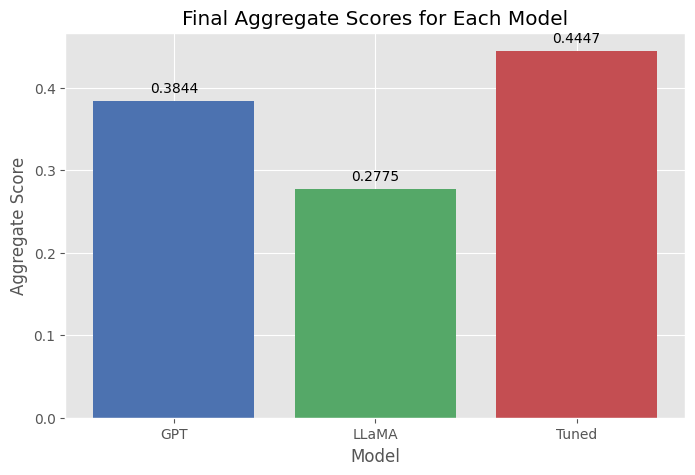

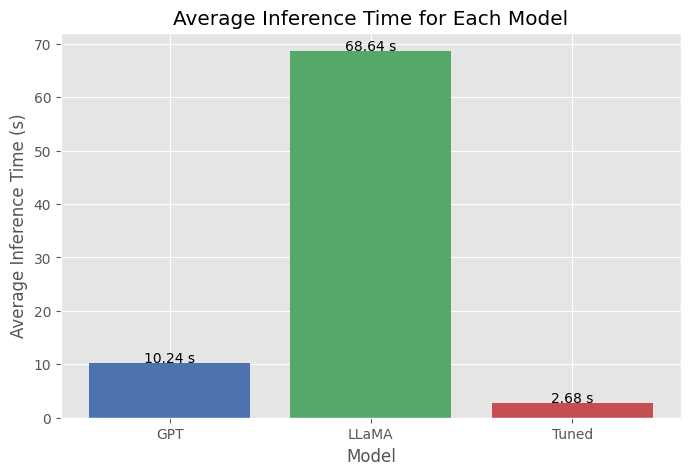

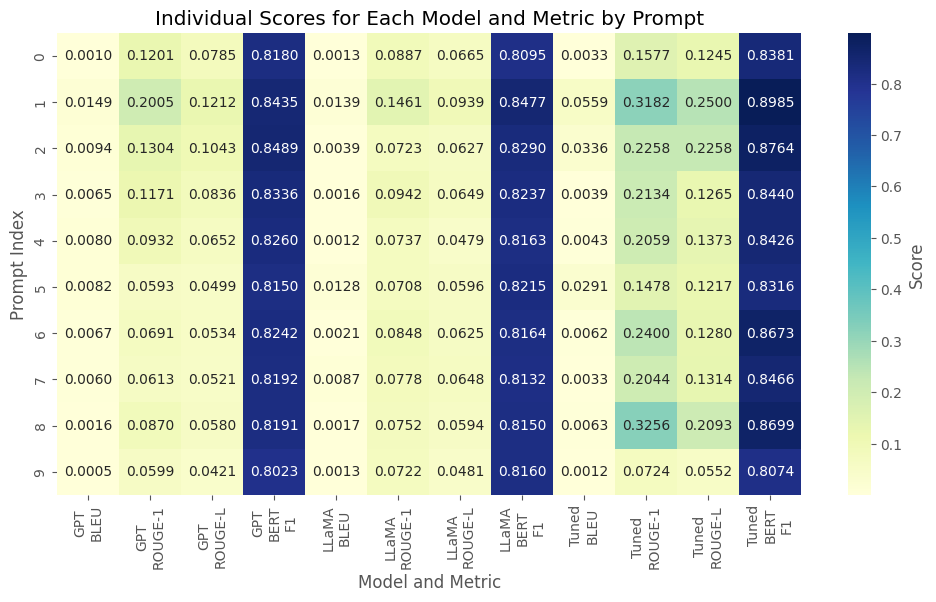

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# You can adjust the plotting as long as it prints meaningful results.

# Set style for better visuals
plt.style.use('ggplot')

# Visualization 1: Bar Chart for Final Aggregate Scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores_df["Model"], final_scores_df["Final Aggregate Score"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Final Aggregate Scores for Each Model")
plt.xlabel("Model")
plt.ylabel("Aggregate Score")
for index, value in enumerate(final_scores_df["Final Aggregate Score"]):
    plt.text(index, value + 0.01, f"{value:.4f}", ha="center")
plt.show()

# Visualization 2: Bar Chart for Average Inference Times
plt.figure(figsize=(8, 5))
plt.bar(average_inference_df["Model"], average_inference_df["Average Inference Time (s)"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Average Inference Time for Each Model")
plt.xlabel("Model")
plt.ylabel("Average Inference Time (s)")
for index, value in enumerate(average_inference_df["Average Inference Time (s)"]):
    plt.text(index, value + 0.1, f"{value:.2f} s", ha="center")
plt.show()

# Visualization 3: Heatmap for Individual Scores by Model and Metric
# Prepare data for heatmap
score_cols = [col for col in df_results.columns if "BLEU" in col or "ROUGE" in col or "BERT F1" in col]
heatmap_data = df_results[score_cols].fillna(0)  # Fill NaNs with 0 for visualization
heatmap_data.columns = [col.replace(" ", "\n") for col in heatmap_data.columns]  # Add line breaks for readability

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Score'})
plt.title("Individual Scores for Each Model and Metric by Prompt")
plt.xlabel("Model and Metric")
plt.ylabel("Prompt Index")
plt.show()


## 7. Experiment and Reflection

Congratulations on completing the Codeathon! Reflect on the experience of building and fine-tuning LLM-based chatbots. Briefly address the following:

* Experience and Challenges: Was it easy, fun, or challenging to set up and experiment with different LLMs? Describe any hurdles with API setup, inference times, or model tuning, and how you tackled them.

* Impact of Fine-Tuning: Reflect on how fine-tuning affected response quality—was there an improvement in coherence, relevance, or speed?

* Performance Metrics: Discuss the utility of metrics like BLEU, ROUGE, and BERTScore in assessing chatbot quality. Did using an aggregate score help in comparing models?

* User Engagement and Multimedia: If you tested multimedia features, did they add value to the chatbot experience?

Once you've reflected on these questions, consider experimenting further by setting up unique conversations or exploring how changes in configurations impact the responses.

Enjoy the possibilities with large language models!

In [ ]:
"""
Experience and Challenges: It was rather easy to write the code that
interacts with the OpenAI API, and the Llama code with Huggingface was
also not too bad. I tried the Gemini API first, but I had some troubles
with model context, and it seemed like the API was stateful even though
the documentation said otherwise. Because of this, I just switched it out
for Llama which worked well. Fine-Tuning was also pretty easy with
the OpenAI API, and it was much more affordable than I thought it would be.

Impact of Fine-Tuning: It seems that the fine-tuned GPT-4o-mini model was
actually measurably better on the train set which makes sense, but it is still
good to see it in the actual data. There seemed to be also an increase in
speed, but I am not sure why this would be. My best guess is that this comes
from how OpenAI is loading the model on the backend, and, if anything, I would
have expected it to be the other way around where the stock model has a faster
response time because it is being served to more people. Regardless, basically
every metric increased with the tuned model, so this was reassuring to see!

Performance Metrics: The aggregate score shows that the tuned model was
significantly better than both the original OpenAI model and Llama. It makes
sense that Llama comes in last place (because it is only 3B parameters). From
looking at the table of BLEU, ROGUE, and BERTScore metrics, it seems that the
tuned model was better almost across the board of not entirely. The fact that
different metrics are all showing the same relative quality between the models
reassures me that the composite score is correct as well. I like this technique!

User Engagement and Multimedia: I didn't implment multimedia features, but
I have used these in the public web apps for ChatGPT, Claude, etc., and they
definitely do enhance the experience, especially with the OCR abilities of
many of these models!
"""